# Making the Figure 1 Pie Charts

In [2]:
import pandas as pd
import numpy as np
import os
#import rasterio
from IPython.display import Image
from shutil import rmtree
from dateutil import parser
import toyplot

import seaborn as sns
import numpy as np
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from matplotlib import rcParams

In [3]:
inat_flowering = pd.read_csv('../../final_data/fulldata_cleaned_matched_GPT_colors.csv')

/var/folders/qh/c7rwx84921n2kznn09zb2pnh0000gn/T/ipykernel_17911/3403387022.py:1: DtypeWarning: Columns (14,29) have mixed types. Specify dtype option on import or set low_memory=False.
  inat_flowering = pd.read_csv('../../final_data/fulldata_cleaned_matched_GPT_colors.csv')


In [4]:
week11 = [70,77]
week21 = [140,147]
latbox = [34,44]
lonbox = [-96,-59]

# Week 11

In [5]:
filtered_df = inat_flowering[(inat_flowering.day_of_year >= week11[0]) & (inat_flowering.day_of_year < week11[1])]
filtered_df = filtered_df[(filtered_df.latitude >= latbox[0]) & (filtered_df.latitude < latbox[1])]
filtered_df = filtered_df[(filtered_df.longitude >= lonbox[0]) & (filtered_df.longitude < lonbox[1])]

In [6]:
np.unique(filtered_df.color,return_counts=True)

(array(['blue', 'brown', 'green', 'maroon', 'orange', 'pink', 'purple',
        'red', 'white', 'yellow'], dtype=object),
 array([ 265,  216,   51,  247,   10,  916,  405,    8, 1590, 1075]))

In [7]:
allcolors = ['green','blue', 'maroon','brown', 'orange','red','pink', 'purple', 'white', 'yellow']
numcolors = []
for color in allcolors:
    numcolors.append(np.sum(np.array(filtered_df.color) == color) / len(filtered_df.color))

In [8]:
numcolors

[0.010662763955676354,
 0.055404557808906546,
 0.05164122935396195,
 0.04515994145933515,
 0.0020907380305247754,
 0.00167259042441982,
 0.19151160359606942,
 0.0846748902362534,
 0.3324273468534393,
 0.22475433828141334]

In [9]:
# combine brown and maroon
nums_reduced = numcolors[0:2] + [numcolors[2]+numcolors[3]] + numcolors[4:]
allcolors_reduced = allcolors[0:2] + ['brown'] + allcolors[4:]

# defining a new brown that looks more... brown... than the default
colors_for_plotting = allcolors_reduced
colors_for_plotting[2] = '#7B3F00'

In [10]:
colors_for_plotting

['green',
 'blue',
 '#7B3F00',
 'orange',
 'red',
 'pink',
 'purple',
 'white',
 'yellow']

In [11]:
colors_for_plotting = list(np.repeat('grey',3))+colors_for_plotting[3:5] + list(np.repeat('grey',2)) + ['grey','grey']
colors_for_plotting

['grey', 'grey', 'grey', 'orange', 'red', 'grey', 'grey', 'grey', 'grey']

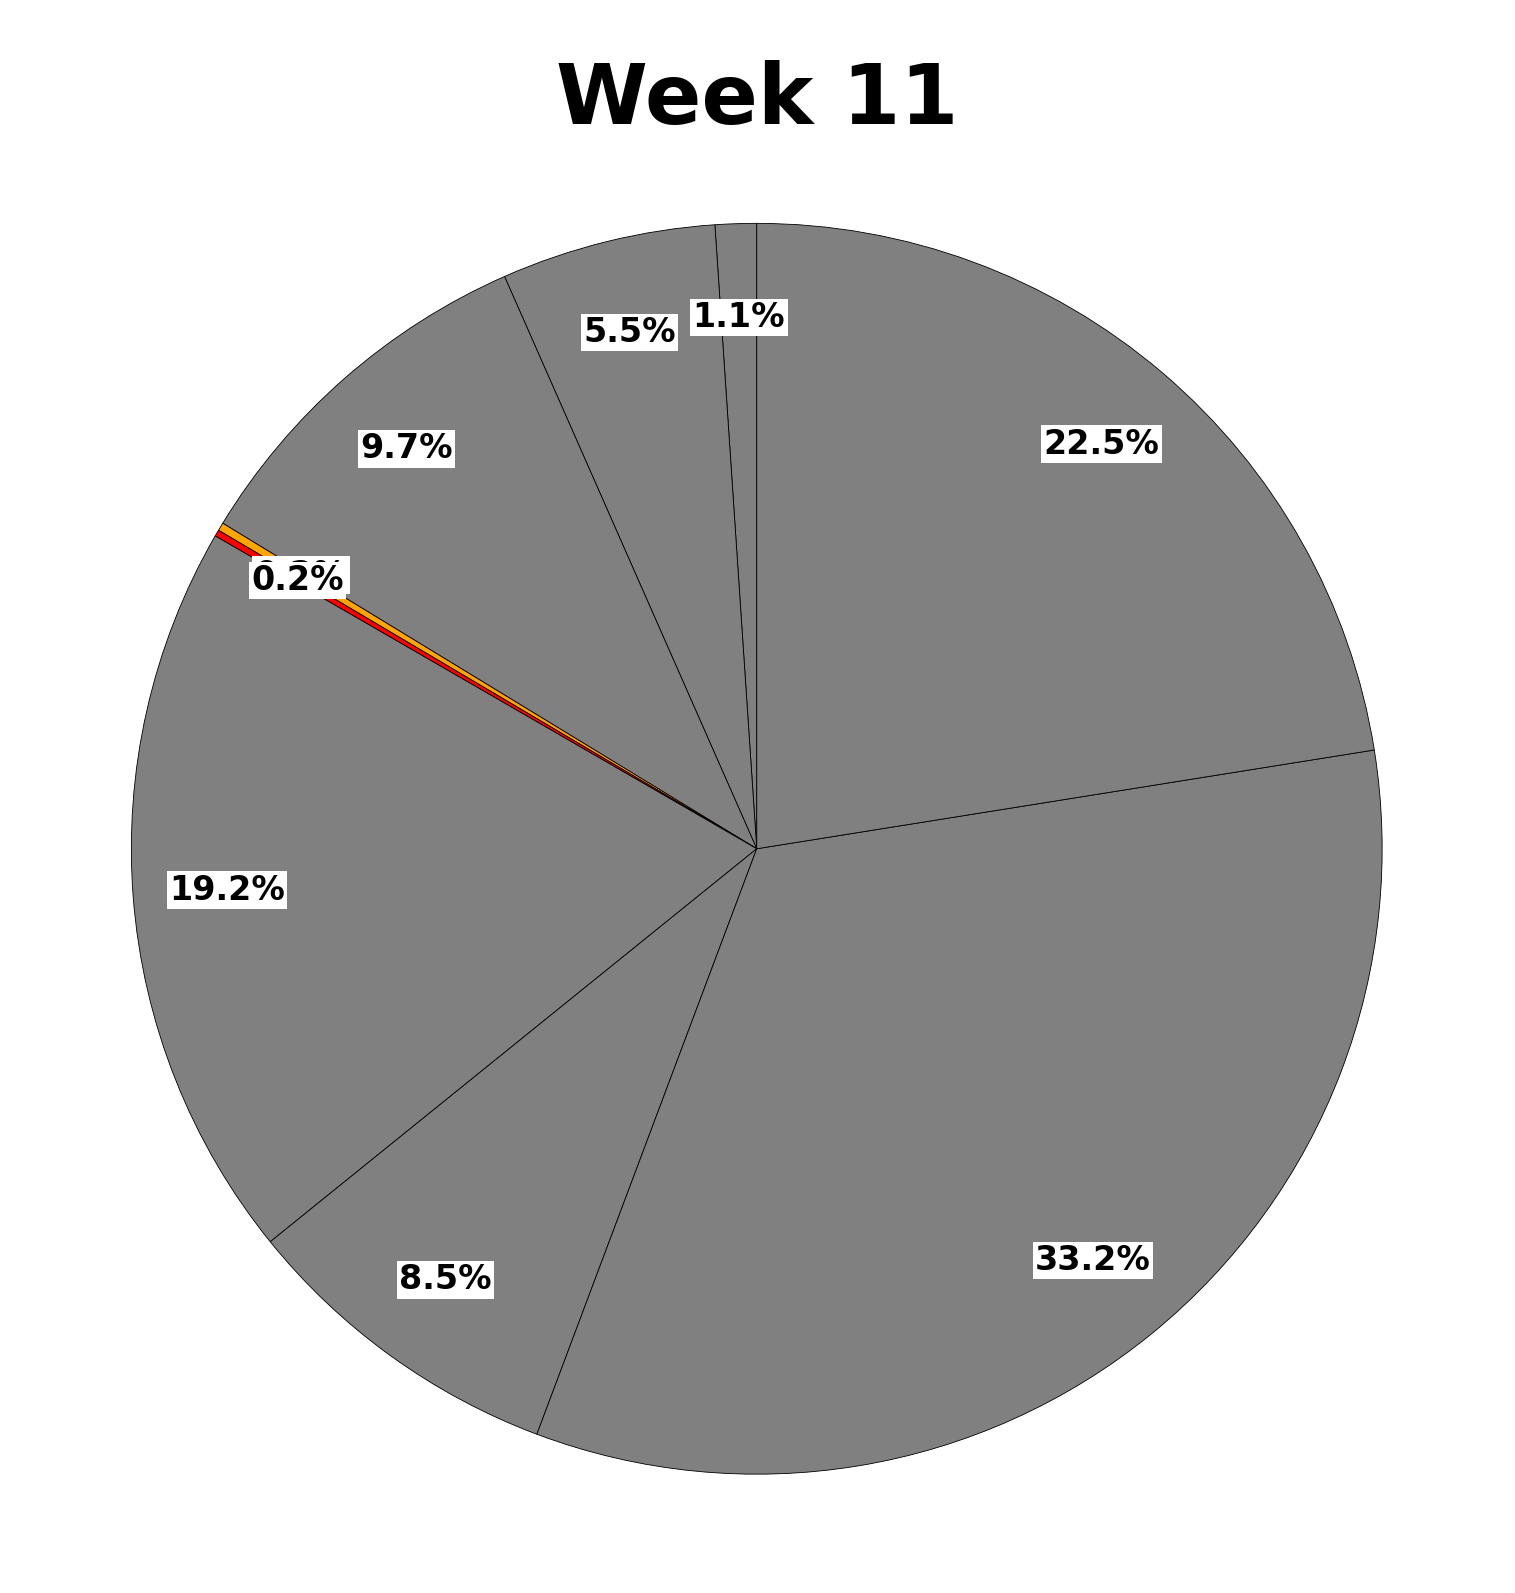

In [13]:
# high resolution
rcParams['figure.dpi'] = 600

# pie chart
fig, ax = plt.subplots(figsize=[3,3])

wedges, texts, autotexts = ax.pie(nums_reduced, colors=colors_for_plotting, labels=None, autopct='%1.1f%%',
                                  startangle=90, textprops=dict(color="black"), pctdistance=.85,
                                  wedgeprops=dict(edgecolor='black', linewidth=.1), labeldistance=1.4)

# circle pie
ax.axis('equal')

# text
plt.setp(texts, size=4)
for autotext in autotexts:
    autotext.set_size(4)
    autotext.set_weight("bold")
    autotext.set_bbox(dict(facecolor='white', edgecolor='none', pad=.3))

# title
plt.title('Week 11', fontsize=10, fontweight='bold')

# save
plt.savefig('../week11.pdf', bbox_inches='tight', dpi=600)

# display
plt.show()

# Week 21

In [14]:
filtered_df = inat_flowering[(inat_flowering.day_of_year >= week21[0]) & (inat_flowering.day_of_year < week21[1])]
filtered_df = filtered_df[(filtered_df.latitude >= latbox[0]) & (filtered_df.latitude < latbox[1])]
filtered_df = filtered_df[(filtered_df.longitude >= lonbox[0]) & (filtered_df.longitude < lonbox[1])]

In [15]:
np.unique(filtered_df.color,return_counts=True)

(array(['blue', 'brown', 'green', 'maroon', 'orange', 'pink', 'purple',
        'red', 'white', 'yellow'], dtype=object),
 array([  836,   805,  1464,   248,   578,  2955,  3875,   713, 11950,
         2884]))

In [16]:
allcolors = ['green','blue', 'maroon','brown', 'orange','red','pink', 'purple', 'white', 'yellow']
numcolors = []
for color in allcolors:
    numcolors.append(np.sum(np.array(filtered_df.color) == color) / len(filtered_df.color))

In [17]:
numcolors

[0.055648471947696516,
 0.031777406112209215,
 0.009426790329937661,
 0.030599057320967005,
 0.021970503268967614,
 0.027102022198570778,
 0.11232324768131367,
 0.14729359890527596,
 0.4542344533982059,
 0.10962444883685571]

In [18]:
# combine brown and maroon
nums_reduced = numcolors[0:2] + [numcolors[2]+numcolors[3]] + numcolors[4:]
allcolors_reduced = allcolors[0:2] + ['brown'] + allcolors[4:]

# defining a new brown that looks more... brown... than the default
colors_for_plotting = allcolors_reduced
colors_for_plotting[2] = '#7B3F00'

In [19]:
colors_for_plotting = list(np.repeat('grey',3))+colors_for_plotting[3:5] + list(np.repeat('grey',2)) + ['grey','grey']
colors_for_plotting

['grey', 'grey', 'grey', 'orange', 'red', 'grey', 'grey', 'grey', 'grey']

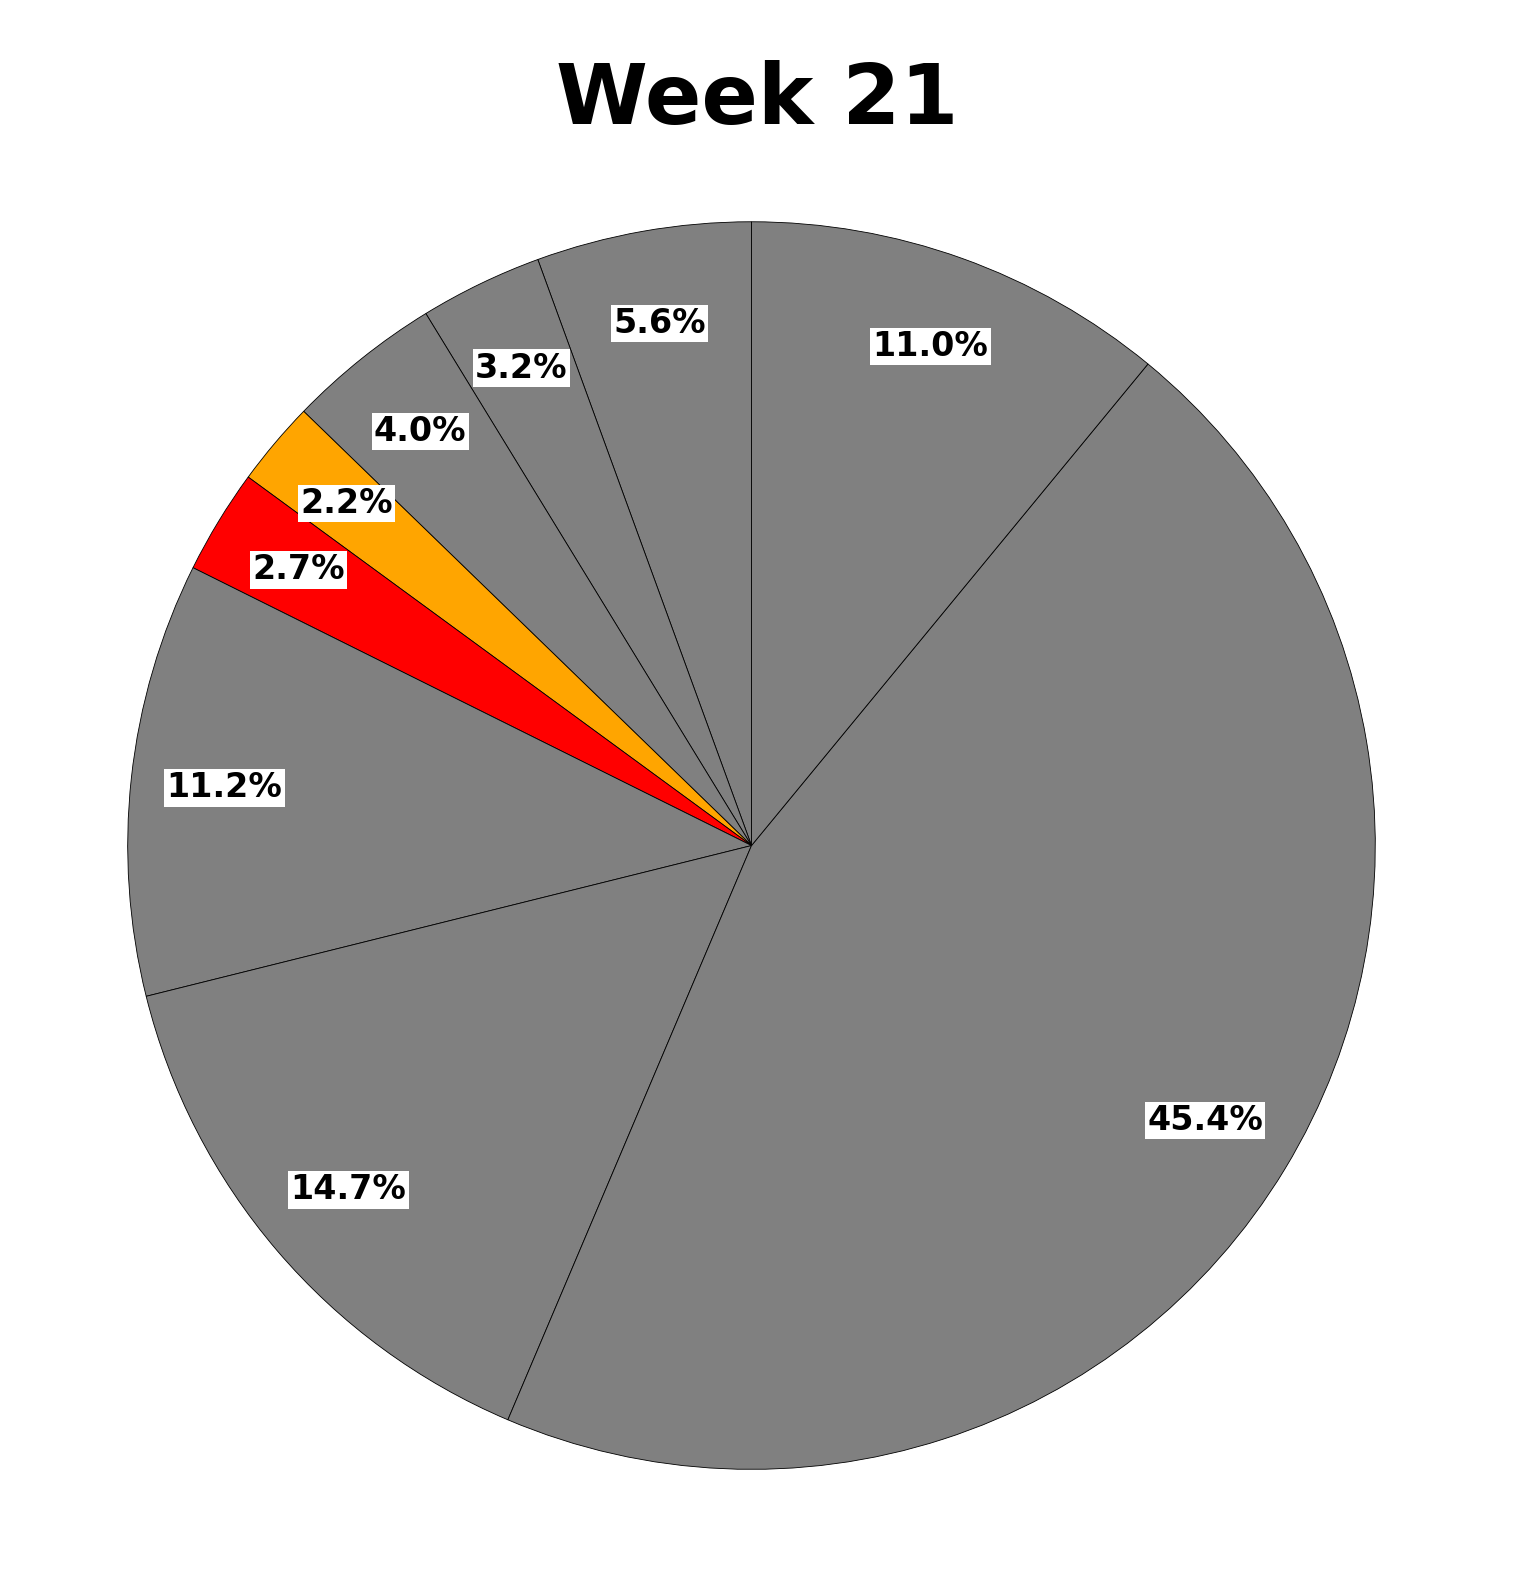

In [20]:
# high res
rcParams['figure.dpi'] = 600

# pie chart data
fig, ax = plt.subplots(figsize=[3,3])

wedges, texts, autotexts = ax.pie(nums_reduced, colors=colors_for_plotting, labels=None, autopct='%1.1f%%',
                                  startangle=90, textprops=dict(color="black"), pctdistance=.85,
                                  wedgeprops=dict(edgecolor='black', linewidth=.1), labeldistance=1.4)

# circle pie
ax.axis('equal')

# text
plt.setp(texts, size=4)
for autotext in autotexts:
    autotext.set_size(4)
    autotext.set_weight("bold")
    autotext.set_bbox(dict(facecolor='white', edgecolor='none', pad=.3))

# title
plt.title('Week 21', fontsize=10, fontweight='bold')

# save
plt.savefig('../week21.pdf', bbox_inches='tight', dpi=600)

# disply
plt.show()